### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # or MinMaxScaler, if used
from sklearn.preprocessing import LabelEncoder  # if categorical labels
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold,GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold


### Loading dataset

In [2]:
df = pd.read_csv('spambase.csv')

### Basic info

In [3]:
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

### Handling missing values

In [4]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### Splitting of feature and target

In [5]:
X = df_imputed.drop('class', axis=1)
y = df_imputed['class']

### Checking Distribution

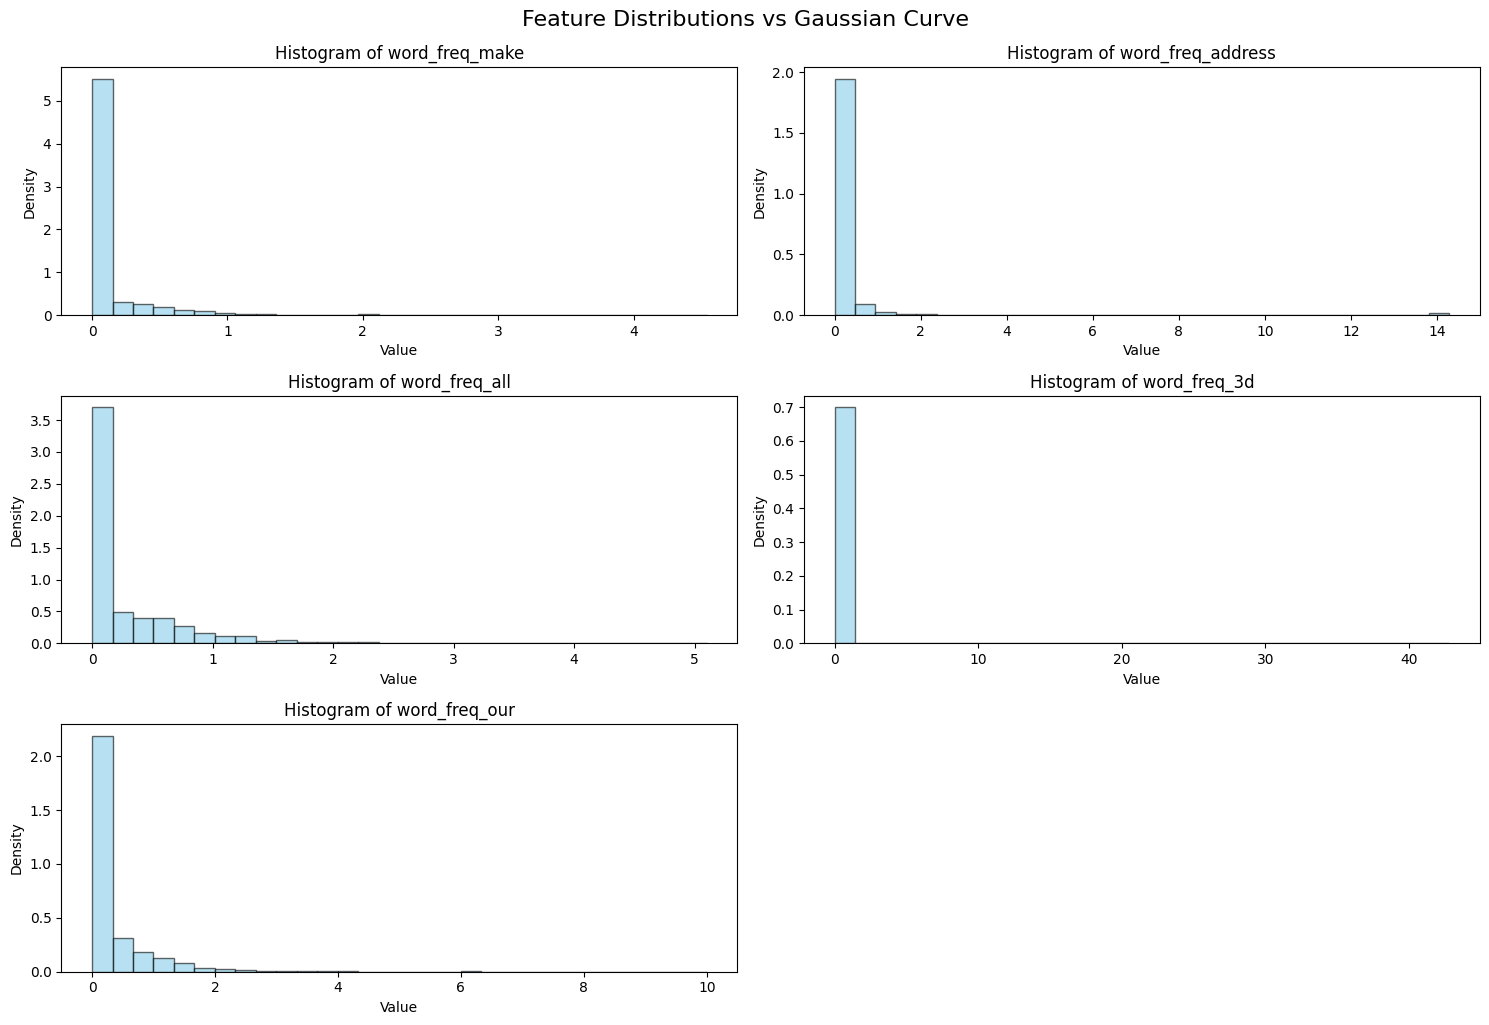

In [6]:
X = df.drop('class', axis=1)  # Assuming 'class' is the target

# Choose a few features to visualize
sample_features = X.columns[:5]  # First 5 features

# Plot histograms with Gaussian curve overlay
plt.figure(figsize=(15, 10))
for i, feature in enumerate(sample_features):
    plt.subplot(3, 2, i + 1)
    data = X[feature]

    # Plot histogram
    count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

    # Plot normal distribution curve
    '''mu, std = data.mean(), data.std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2))
    plt.plot(x, p, 'r', linewidth=2)'''

    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle('Feature Distributions vs Gaussian Curve', fontsize=16, y=1.02)
plt.show()


### Applying min max scaling

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Plots

### Histogram

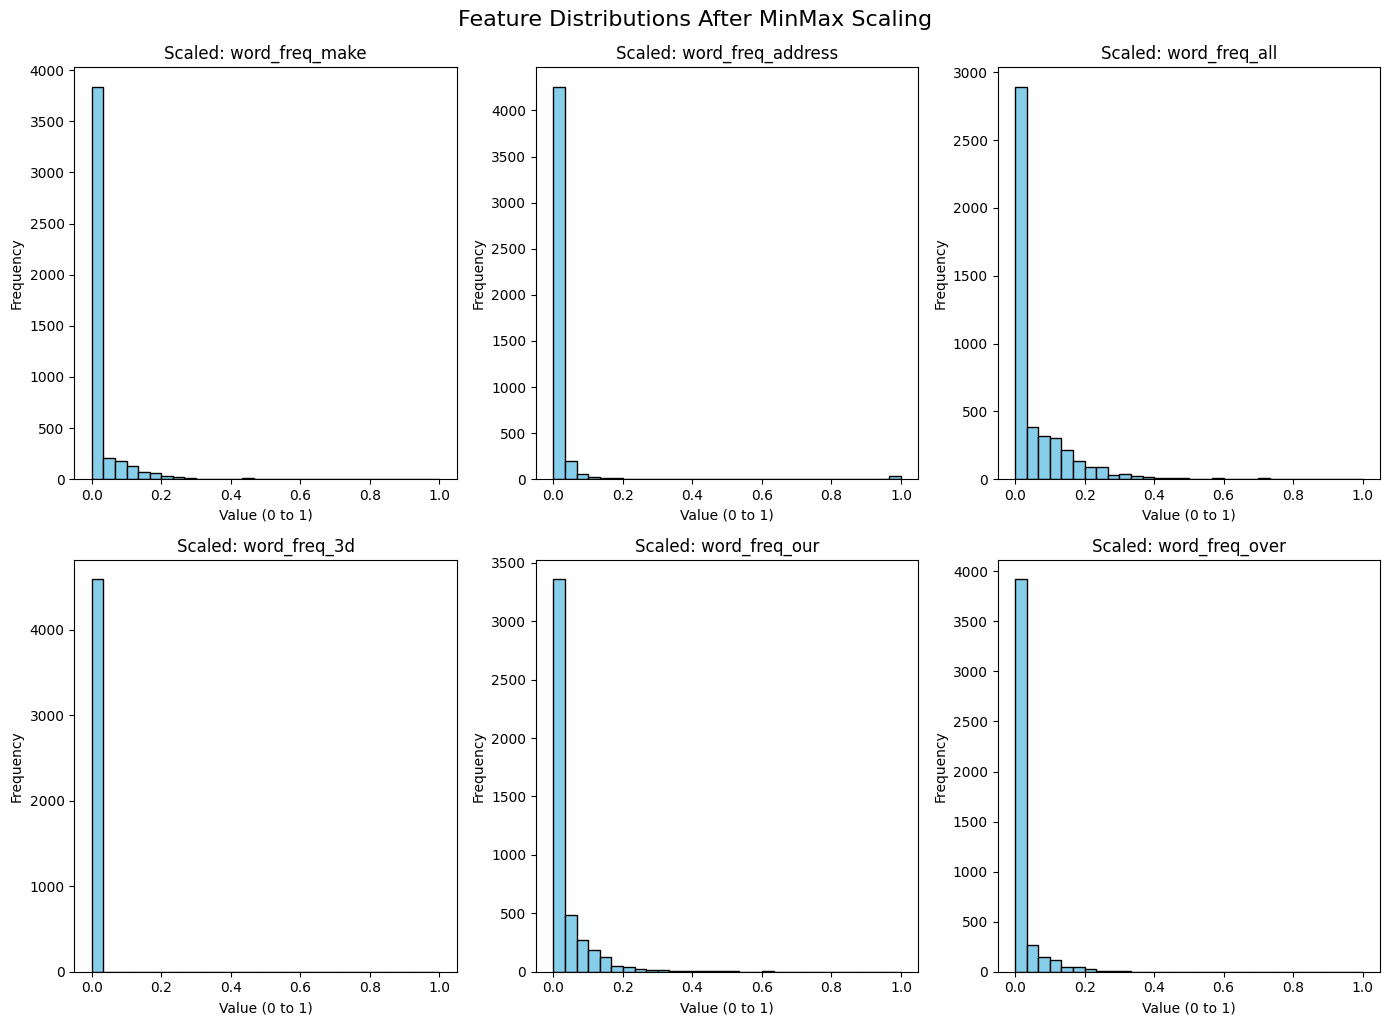

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
for i in range(6):  # first 6 features as an example
    plt.subplot(2, 3, i + 1)
    plt.hist(X_scaled[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Scaled: {X.columns[i]}')
    plt.xlabel('Value (0 to 1)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Feature Distributions After MinMax Scaling', fontsize=16, y=1.02)
plt.show()


### Boxplot

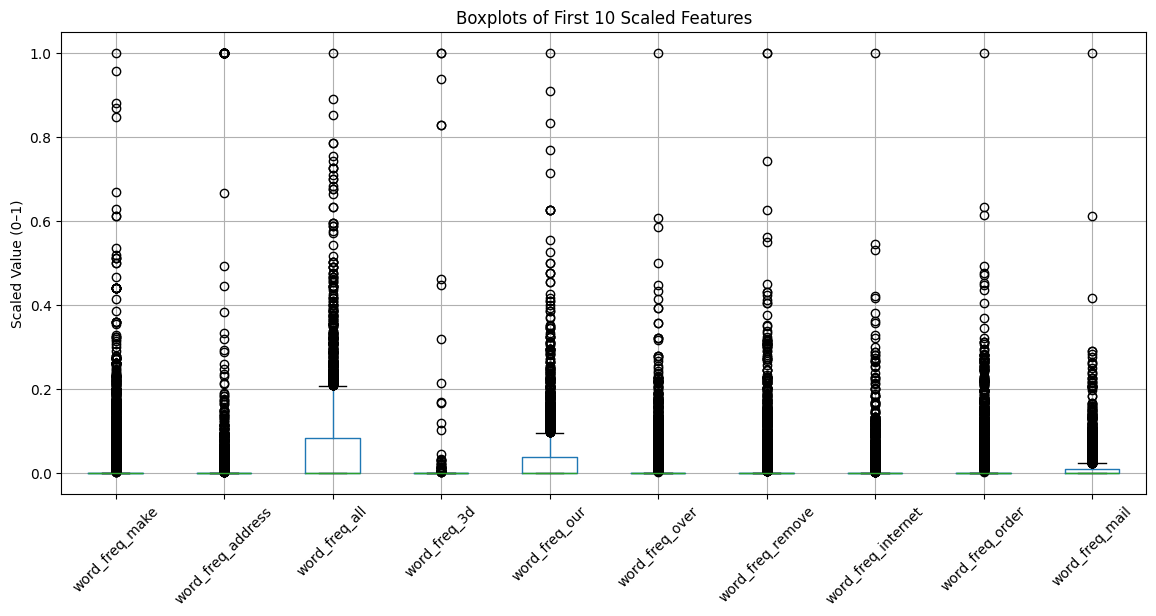

In [9]:
import pandas as pd

# Convert scaled array back to DataFrame for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

plt.figure(figsize=(14, 6))
X_scaled_df.iloc[:, :10].boxplot(rot=45)
plt.title('Boxplots of First 10 Scaled Features')
plt.ylabel('Scaled Value (0–1)')
plt.grid(True)
plt.show()


### Correlation HeatMap

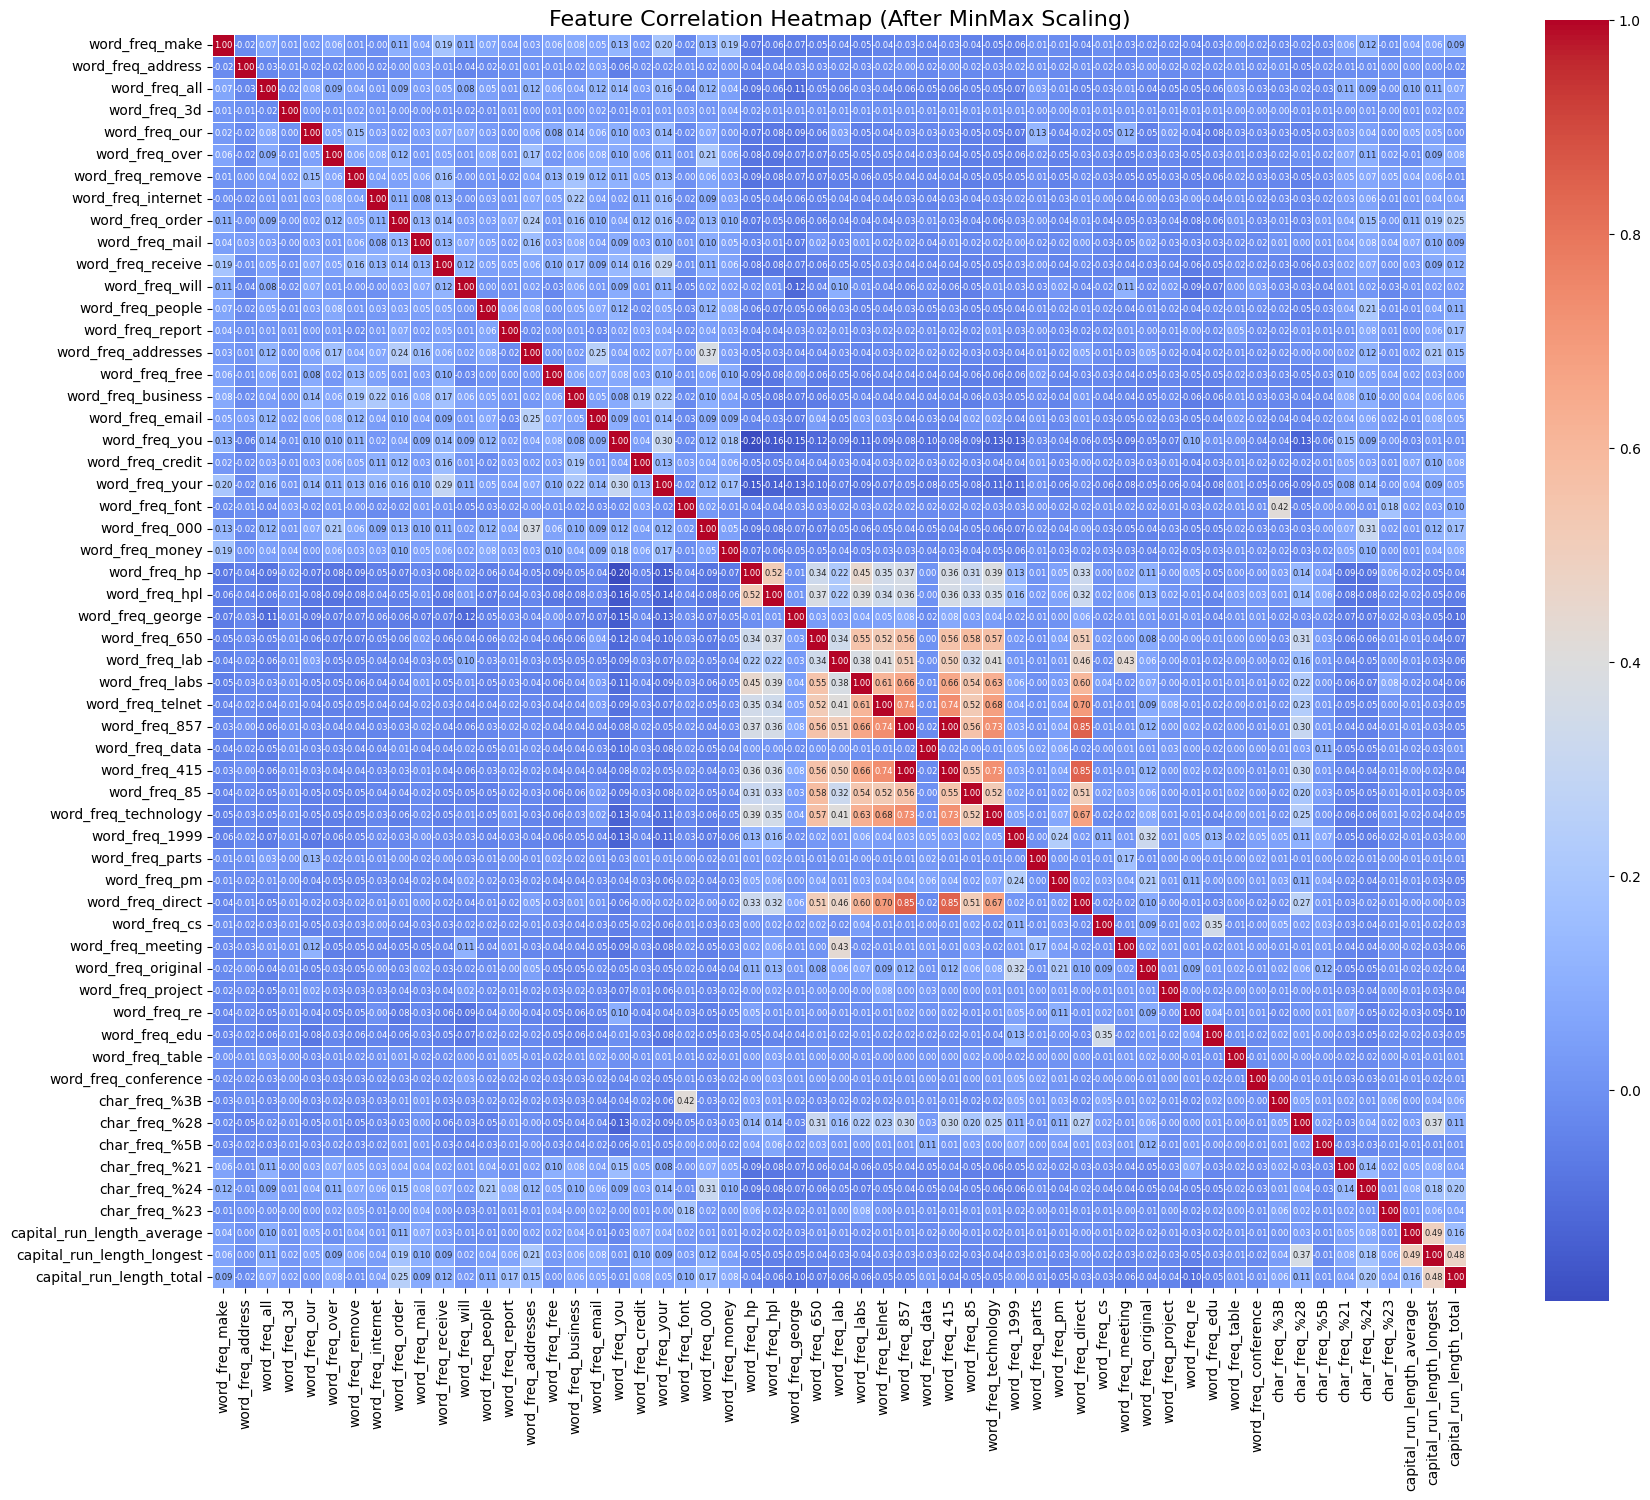

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_scaled_df is your scaled DataFrame
corr_matrix = X_scaled_df.corr()

plt.figure(figsize=(18, 15))  # Bigger figure
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    square=True,
    annot=True,               # Show values inside squares
    fmt=".2f",                # Format to 2 decimal places
    linewidths=0.5,           # Thin grid lines
    annot_kws={"size": 6}     # Smaller font size
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Feature Correlation Heatmap (After MinMax Scaling)", fontsize=16)
plt.tight_layout()
plt.show()


### Model Training

In [11]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc,
    classification_report
)

# Split the data again (or reuse your earlier split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)


Fold 1: Accuracy = 0.9359
Fold 2: Accuracy = 0.9250
Fold 3: Accuracy = 0.9402
Fold 4: Accuracy = 0.9337
Fold 5: Accuracy = 0.9326
➡️ Mean Accuracy: 0.9335 ± 0.0050

🔍 Evaluating SVM with LINEAR kernel...
Accuracy : 0.8993
Precision: 0.9108
Recall   : 0.8254
F1 Score : 0.8660

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       837
         1.0       0.91      0.83      0.87       544

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381



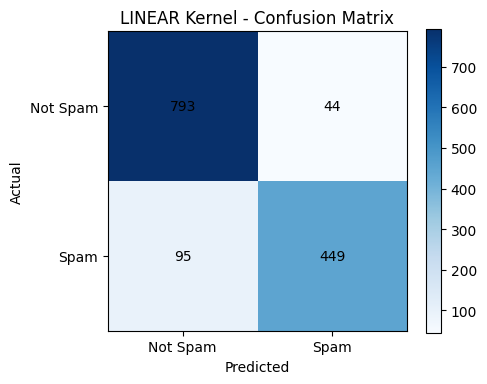

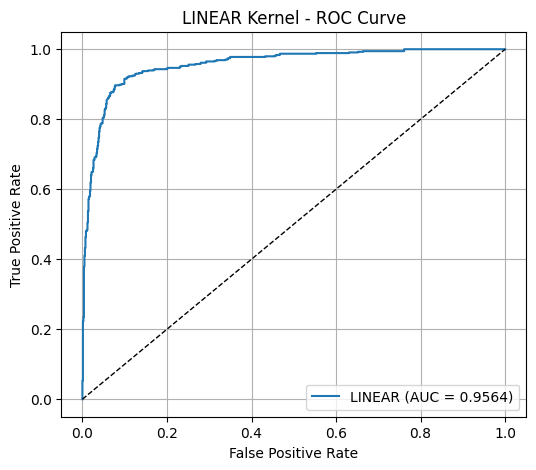


🔍 Evaluating SVM with POLY kernel...
Accuracy : 0.8501
Precision: 0.9423
Recall   : 0.6599
F1 Score : 0.7762

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.89       837
         1.0       0.94      0.66      0.78       544

    accuracy                           0.85      1381
   macro avg       0.88      0.82      0.83      1381
weighted avg       0.87      0.85      0.84      1381



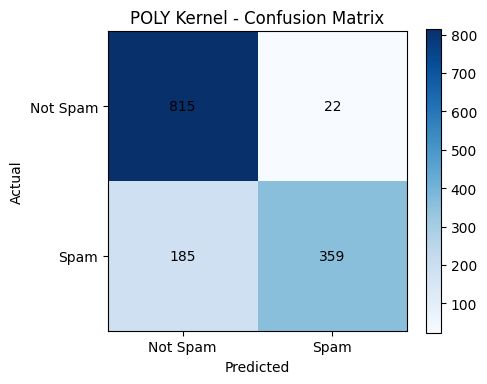

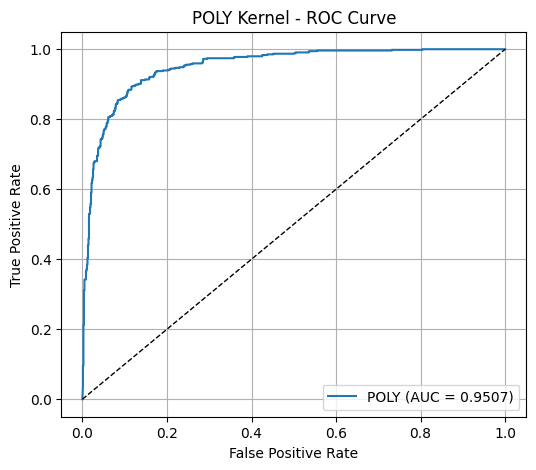


🔍 Evaluating SVM with RBF kernel...
Accuracy : 0.9261
Precision: 0.9250
Recall   : 0.8842
F1 Score : 0.9041

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       837
         1.0       0.93      0.88      0.90       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



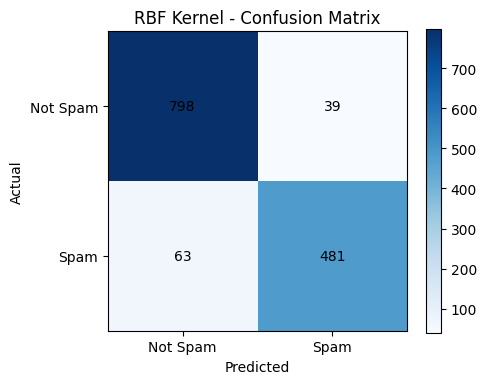

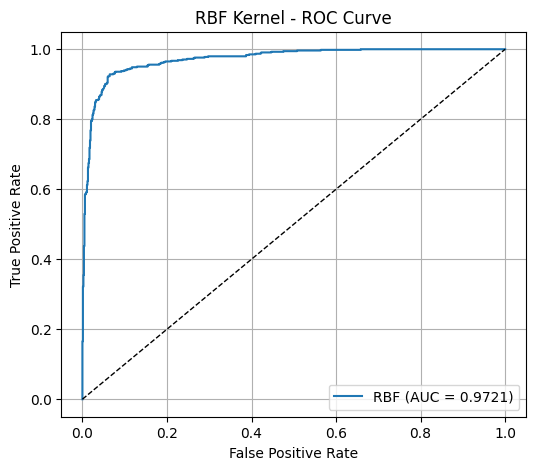


🔍 Evaluating SVM with SIGMOID kernel...
Accuracy : 0.8023
Precision: 0.7694
Recall   : 0.7114
F1 Score : 0.7393

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       837
         1.0       0.77      0.71      0.74       544

    accuracy                           0.80      1381
   macro avg       0.80      0.79      0.79      1381
weighted avg       0.80      0.80      0.80      1381



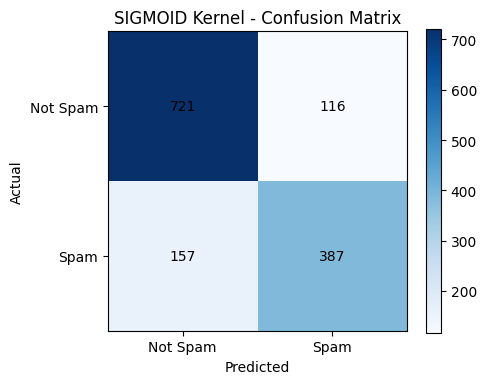

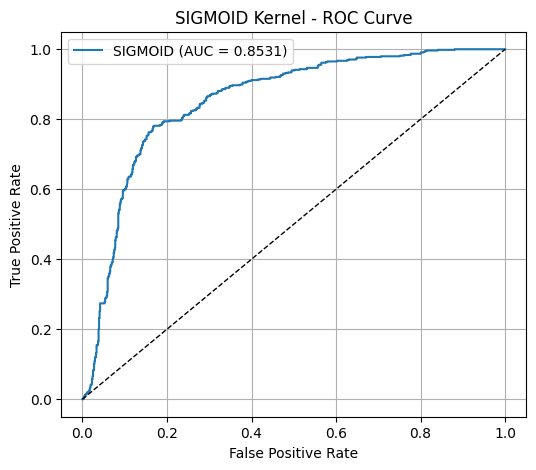

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)


# Your dataset X (features) and y (labels) must already be defined
pipeline = make_pipeline(
    MinMaxScaler(),
    SVC(kernel='rbf', C=10, gamma='scale')
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

for i, acc in enumerate(scores, 1):
    print(f"Fold {i}: Accuracy = {acc:.4f}")
print(f"➡️ Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

def evaluate_svm(kernel):
    print(f"\n🔍 Evaluating SVM with {kernel.upper()} kernel...")

    # Create and train SVM model
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # for ROC

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(conf, cmap='Blues')
    plt.title(f'{kernel.upper()} Kernel - Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Not Spam', 'Spam'])
    plt.yticks([0, 1], ['Not Spam', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, conf[i, j], ha='center', va='center')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{kernel.upper()} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{kernel.upper()} Kernel - ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Store results
    results.append({
        "Kernel": kernel.capitalize(),
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": roc_auc
    })

# Run evaluations for all kernels
for kernel in kernels:
    evaluate_svm(kernel)



In [13]:
# Display tabular summary
print("\n📊 SVM Kernel Comparison Summary:\n")
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))



📊 SVM Kernel Comparison Summary:

 Kernel  Accuracy  Precision   Recall  F1 Score      AUC
 Linear  0.899348   0.910751 0.825368  0.865959 0.956425
   Poly  0.850109   0.942257 0.659926  0.776216 0.950749
    Rbf  0.926140   0.925000 0.884191  0.904135 0.972150
Sigmoid  0.802317   0.769384 0.711397  0.739255 0.853074


In [14]:
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# Best Parameters
print("🔍 Best Parameters Found:")
print(grid.best_params_)

# Best Estimator
best_svm = grid.best_estimator_

# Evaluate on test set
y_pred = best_svm.predict(X_test)

print("\n📊 Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
🔍 Best Parameters Found:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

📊 Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       837
         1.0       0.93      0.88      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381

✅ Test Accuracy: 0.9275887038377987


In [16]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
pipeline = make_pipeline(
    MinMaxScaler(),
    SVC(kernel='rbf', C=10, gamma='scale')
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

for i, acc in enumerate(scores, 1):
    print(f"Fold {i}: Accuracy = {acc:.4f}")
print(f"➡️ Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Fold 1: Accuracy = 0.9359
Fold 2: Accuracy = 0.9250
Fold 3: Accuracy = 0.9402
Fold 4: Accuracy = 0.9337
Fold 5: Accuracy = 0.9326
➡️ Mean Accuracy: 0.9335 ± 0.0050


In [18]:
import time

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    params = {'kernel': kernel, 'C': 10.0, 'probability': True, 'random_state': 42}

    # Add kernel-specific hyperparameters
    if kernel == 'poly':
        params.update({'degree': 3, 'gamma': 'scale'})
    elif kernel in ['rbf', 'sigmoid']:
        params.update({'gamma': 'scale'})

    model = SVC(**params)

    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Kernel": kernel.capitalize(),
        "Hyperparameters": str({k: v for k, v in params.items() if k != 'kernel'}),
        "Accuracy": round(acc, 4),
        "F1 Score": round(f1, 4),
        "Training Time (s)": round(end - start, 3)
    })

# Create and display final table
df_table4 = pd.DataFrame(results)
print("\nTable 4: SVM Performance with Different Kernels and Parameters")
print(df_table4.to_string(index=False))



Table 4: SVM Performance with Different Kernels and Parameters
 Kernel                                                                     Hyperparameters  Accuracy  F1 Score  Training Time (s)
 Linear                                {'C': 10.0, 'probability': True, 'random_state': 42}    0.9182    0.8951              1.088
   Poly {'C': 10.0, 'probability': True, 'random_state': 42, 'degree': 3, 'gamma': 'scale'}    0.8979    0.8597              1.535
    Rbf              {'C': 10.0, 'probability': True, 'random_state': 42, 'gamma': 'scale'}    0.9276    0.9058              1.339
Sigmoid              {'C': 10.0, 'probability': True, 'random_state': 42, 'gamma': 'scale'}    0.7864    0.7209              1.317


### K Fold Cross Validation

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler  # or StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

# RBF kernel SVM
svm_rbf = make_pipeline(MinMaxScaler(), SVC(kernel='rbf', C=10.0, gamma='scale'))

# 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_rbf, X, y, cv=cv, scoring='accuracy')

# Print each fold and mean
for i, acc in enumerate(scores, 1):
    print(f"Fold {i}: Accuracy = {acc:.4f}")
print(f"\n➡️ Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Fold 1: Accuracy = 0.9359
Fold 2: Accuracy = 0.9250
Fold 3: Accuracy = 0.9402
Fold 4: Accuracy = 0.9337
Fold 5: Accuracy = 0.9326

➡️ Mean Accuracy: 0.9335 ± 0.0050
